# BBC - Projet 2016
## Vaccin peptidique contre la bactérie Helicobacter Pylori

- Professeur: Carlos Peña (<a href="mailto:carlos.pena@heig-vd.ch">carlos.pena@heig-vd.ch</a>)
- Assistante: Aitana Lebrand (<a href="mailto:aitana.nevesdasilva@heig-vd.ch">aitana.nevesdasilva@heig-vd.ch</a>)

- Etudiants : Raphaël Racine et Nicolas Kobel

Date: 10 mai 2016
<br><br>

# Contexte

## Vaccin
Pour expliquer ce qu’est un vaccin, nous nous sommes inspirés de l’article suivant :
https://fr.wikipedia.org/wiki/Vaccination.

Un vaccin est une substance que l’on injecte dans un corps humain ou animal. Il permet de créer une réaction immunitaire positive contre une maladie infectieuse. 

C’est un antigène qui permet de stimuler le système immunitaire afin qu’il puisse s’activer de manière plus rapide et plus forte lors de la présence d’une vraie contamination.
Il existe plusieurs types de vaccins, mais on s’intéressera particulièrement au vaccin peptidique.

## Vaccin peptidique
Un vaccin peptidique permet d’injecter un ou plusieurs séquences d’acides aminés (courtes ou longues) d’antigènes, en y combinant des adjuvants.

### Adjuvant
Un adjuvant permet de renforcer ou stimuler un système immunitaire lorsqu’elle est administrée conjointement avec un antigène ( source : https://fr.wikipedia.org/wiki/Adjuvant ). Il s’agit d’un composant toxique.
Un antigène est caractérisé par son ensemble d’épitopes.

## Epitope
Pour expliquer ce qu’est un épitope, nous nous sommes inspirés de l’article suivant :
https://fr.wikipedia.org/wiki/%C3%89pitope.

Un épitope est un déterminant antigénique présentée sous forme de molécule reconnaissable par un paratope (partie variable d’un anticorps). 

Epitope est un synonyme de peptide dans le cas où celui-ci est reconnaissable par un paratope.

## Bactérie

Une bactérie est un micro-organisme capable de se reproduire. Il est à noter qu’il s’agit d’un organisme qui n’est ni végétal, ni animal.

Il s’agit d’un organisme procaryote, dont la structure cellulaire ne possède donc pas de noyau.

### Helicobacter Pilory
Pour expliquer ce qu’est la bactérie H Pylori, nous nous sommes inspirés de l’article suivant : http://www.e-sante.fr/helicobacter-pylori-bacterie-tous-dangers/actualite/1534.

La bactérie Helicobacter Pylori est une bactérie très petite responsable de plusieurs maladies de l’estomac, dont certaines peuvent aller jusqu’au cancer de l’estomac (qui commence en général par des ulcères).

Comme son nom l’indique, il s’agit d’une bactérie en forme d’hélice et sa particularité et de se sentir « chez elle » dans l’estomac malgré les niveaux d'acidité élevés dans cet environnement.	
Cette bactérie sécrète de l'uréase. Cette protéine permet à la bactérie de de transformer l'acide gastrique en ammoniaque anodin pour la bactérie. L'autre mécanisme de défense contre l'acide gastrique est la capacité de H. Pylori de pouvoir pénétrer la couche muqueuse de l'estomac.[1]

Cette couche muqueuse protège l'estomac, et donc le corps humain de sa propre acidité. Lorsque pénétrée par la bactérie, l'équilibre chimique de la muqueuse est dérangé. Ceci affaiblit la protection et peut mener à des ulcères voir des cancers.
Cette protéine est subdivisée en deux gènes appelés ureA et ureB. Ces deux gènes participent (avec d’autres gènes accessoires) à l’activité enzymatique de la bactérie.
[1]http://www.cancer.gov/about-cancer/causes-prevention/risk/infectious-agents/h-pylori-fact-sheet

## Protéine Uréase
La protéine Urease présente dans la bactérie H pilory a la forme suivante :
 
Source : http://www.rcsb.org/pdb/explore/explore.do?structureId=1e9y 

![](img/urease.png)

Elle forme un complexe supramoléculaire « Dodecameric » composé de 12 copies de couples (UreA, UreB) qui se trouve chacune dans un site actif, qui permet à la bactérie de survivre. Il y a donc 12 sites actifs dans cette protéine.

### Sous unité UreB
Source : http://www.rcsb.org/pdb/explore/explore.do?structureId=1e9y 

La sous-unité UreB est celle qui nous intéresse car c’est à partir de celle-ci qu’il sera possible de prédire des épitopes potentiellement utilisables dans le vaccin.

Cette sous-unité possède actuellement 5 mutations différentes : <b>K219X, L324K, I355A, I522V, D531N.</b>

Elle possède les gènes suivants : <b>ureB, hpuB, HP_0072</b>.

On peut trouver des informations (notamment sur les séquences de cette sous-unité UreB) à partir de la base de données UniprotKG (Swiss-Prot) sur le lien suivant : http://www.uniprot.org/uniprot/P69996

![](img/structure_ureb.png)

# Etat de l'art

## Diagnostique / Détection

En règle générale un dépistage de H. Pylori se fait lorsqu’un patient présente certains des symptômes suivants [1]:
<ul>
    <li>peines abdominales
	<li>nausées et vomissements
	<li>anémie
	<li>halitose
</ul>

### Outils de diagnostique
Les outils de diagnostiques les plus fréquemment utilises sont [2]:

<ul>
    <li>Tests de l'haleine</li>

    <i>La bactérie modifiant certaines substances dans l'estomac, il est possible de faire ingérer au patient de l'urée légèrement radioactif et de mesurer la présence des transformas.</i>
    <li>Tests sanguins.</li>

    <i>Comme les tests sanguins ne détectent uniquement la présence d'anticorps contre cette bactérie, ils deviennent inefficaces après vaccination et/ou première infections.</i>

    <li>Examen des selles.</li>

    <i>Des traces de H. Pylori peuvent être détectées dans les celles d'un patient affecte.</i>

    <li>Biopsie.</li>

    <i>La biopsie est la méthode la plus invasive mais la plus précise. Elle se fait lors d'une endoscopie. En raison de son caractère invasif, une biopsie n'est normalement utilise uniquement si le patient doit subir une endoscopie pour d'autres raisons (traitement de saignements internes, vérification de présence de cellules cancéreuses, etc.).</i>
</ul>

## Traitement
H. Pylori est traitable par des antibiotiques. Du a une prolifération de bactéries résistante aux antibiotiques, les traitements conseillés sont des traitements triple. 

Ils combinent en règle générale deux antibiotiques avec des Inhibiteur de la pompe à protons (IPP). L'action de l'IPP est de diminuer la production d'acide gastrique. 

L'IPP est indispensable à ce genre de traitement, les antibiotiques n'étant pas efficaces en milieux acides.

## Prévention
Les règles d'hygiène standard s'appliquent à la prévention contre l'infection avec H. Pylori (ce nettoyer les mains, ne pas partager les verres, ...)[4].

Dans un article publié en 2015 dans le Lancet, un groupe de médecins chinois a évalué l'efficacité d'un vaccin contre H. Pylori développé en 2005. Ils évaluent le succès de ce vaccin a environ 70% mais se montrent encore dubitatif quant au long-terme[5].
ImevaX, une start-up cofondée par l'université technique de Munich a annoncé en 2014 avoir créé un vaccin qui aurait une efficacité stérilisante de 80% dans les souris. Des tests cliniques sont prévus pour le début de l'année 2016 pour vérifier ces propriétés dans l'humain[6].

## Sources
 [1]http://www.medicinenet.com/helicobacter_pylori/article.htm
 
[2]https://www.nlm.nih.gov/medlineplus/ency/article/007501.htm 


[3]http://emedicine.medscape.com/article/176938-treatment 

[4]http://www.cdc.gov/ulcer/files/hpfacts.PDF 

[5]http://www.thelancet.com/journals/lancet/article/PIIS0140-6736%2815%2960310-5/abstract 

[6]http://www.technologist.eu/towards-the-first-helicobacter-pylori-vaccine/ 


# Réalisation
Tout d'abord, commençons par récupérer les différentes souches de la bactérie H pilory (uniquement celles correspondantes à la protéine Uréase, car on ne s'intéresse pas aux autres).

In [1]:
# Importation des librairies nécessaires
from Bio import Entrez
Entrez.email = "raphael.racine@heig-vd.ch"

In [2]:
# On s'intéresse à toutes les souches de bactérie ayant comme gène ureB (celui qui nous intéresse pour le vaccin peptidique)

query = '"Helicobacter pylori"[orgn] AND "ureB"[gene]'
handle = Entrez.esearch(db='nucleotide',retmax=1000, term=query)
record = Entrez.read(handle)
gi = record['IdList']

print gi
print len(gi)

['15644634', '987858028', '215479238', '425628494', '425626953', '815729549', '815729547', '815729545', '815729543', '815729541', '815729539', '815729537', '815729535', '815729533', '815729531', '815729529', '815729527', '815729525', '815729523', '815729521', '815729519', '815729517', '815729515', '815729513', '815729511', '815729509', '815729507', '815729505', '815729503', '815729501', '254000649', '532105813', '409896556', '409894893', '409893163', '387572303', '384561342', '384559777', '384558251', '384556702', '384551775', '380873809', '344335753', '344334211', '344331165', '325996870', '325995266', '317013424', '317011857', '317010283', '317008680', '308064373', '308062870', '308061305', '308059716', '307636682', '261838873', '261837457', '210132169', '208431905', '12057207', '297379223', '332672788', '531072757', '315585794', '443620964', '393152452', '393092936', '393031057', '393029926', '393012097', '384374920', '384374758', '384374456', '51989331', '31580720', '28372405', '19

Maintenant, nous allons créer un fichier fasta qui contiendra les séquences de chaque souche de la bactérie que nous avons trouvées précédemment.

In [3]:
from Bio import SeqIO
protein_seq = Entrez.efetch(db="nucleotide",id=gi,rettype="fasta_cds_aa",retmode="text")
protein_seq = list(SeqIO.parse(protein_seq, "fasta"))

In [4]:
# Nous devons conserver uniquement les séquences avec le gène ureB, pour ne pas avoir les autres...
updated_protein_seq = [ ps for i,ps in enumerate(protein_seq) if ps.description.find('gene=ureB')>0 ]

print updated_protein_seq[0]

ID: lcl|NC_000915.1_prot_NP_206872.1_62
Name: lcl|NC_000915.1_prot_NP_206872.1_62
Description: lcl|NC_000915.1_prot_NP_206872.1_62 [gene=ureB] [protein=urease subunit beta] [protein_id=NP_206872.1] [location=complement(75527..77236)]
Number of features: 0
Seq('MKKISRKEYVSMYGPTTGDKVRLGDTDLIAEVEHDYTIYGEELKFGGGKTLREG...SIF', SingleLetterAlphabet())


In [6]:
# Création du fichier Fasta
output_handle = open('souches_bacterie_h_pilory_ureB_et_epitopes.fasta', 'w')
SeqIO.write(updated_protein_seq, output_handle, "fasta")

# Nous devons inclure dans ce fichier FASTA les épitopes que nous avons prédies avec ImmuneEpitope dans la protéine Urease afin de pouvoir les
# aligner avec les souches (fichier epitopes_immuneepitope.txt)
input_handle = open('epitopes_immuneepitope.txt', 'r')

sequences_epitopes = input_handle.readlines()

for i, seq in enumerate(sequences_epitopes):
    output_handle.write('>ImmuneEpitope_SEQ' + str(i) + '\n' + seq)

input_handle.close()

# Nous devons inclure dans ce fichier FASTA les épitopes que nous avons prédies avec SVM dans la protéine Urease afin de pouvoir les
# aligner avec les souches (fichier epitopes_SMV.txt)
input_handle = open('epitopes_SVM.txt', 'r')

sequences_epitopes = input_handle.readlines()

output_handle.write('\n') # Nécessaire !!!

for i, seq in enumerate(sequences_epitopes):
    output_handle.write('>EpitopeSVM_SEQ' + str(i) + '\n' + seq)

input_handle.close()

output_handle.close()

# EXEMPLE LABO 2

Sur Aliview, il est possible d’enregistrer l’alignement: File > Save as Clustal (aln). 

Pour la suite du labo, nous allons générer ce même alignement à l’aide de la librairie biopython et faire quelques analyses sur cet alignement.

<b>→ Importez les modules suivants:</b>

In [149]:
from Bio.Align.Applications import MuscleCommandline
from Bio import AlignIO

<b>→ Spécifiez le chemin vers votre exécutable muscle</b>

In [150]:
muscle_loc = "D:\HEIG-VD\Semestre 6\BBC - Bioinformatique et Biologie Computationelle\installation\muscle.exe" # modifier si nécessaire

<b>→ Réalisez l’alignement à partir du fichier FASTA contenant les séquences</b>

In [151]:
in_file = 'labo-2_protein-sequences.fasta'
out_file = 'labo-2_protein-sequences.aln'

muscle_cline = MuscleCommandline(cmd=muscle_loc,input=in_file,out=out_file,clwstrict=True)
stdout, stderr = muscle_cline()

muscle_align = AlignIO.read(out_file,'clustal') # this command actually performs the alignment
print(muscle_align)

SingleLetterAlphabet() alignment with 198 rows and 507 columns
MEWNTFFLVILIIIIKSTTSQITQRPPAENISTYHADWDTPLYT...QMI HQ112236.1_Finland
MEWNTFFLVILIIIIKSTTSQITQRPPAENISTYHADWDTPLYT...QMI HQ112233.1_Finland
MEWNTFFLVILIIIIKSTTSQITQRPPAENISTYHADWDTPLYT...QMI AY546577.1_NA
MEWNTFFLVILIIIIKSTTSQITQRPPAENISTYHADWDTPLYT...QMI KM244767.1_NA
MEWNTFFLVILIIIIKSTTSQITQRPPAENISTYHADWDTPLYT...QMI AY546578.1_NA
MEWNTFFLVILIIIIKSTTSQITQRPPAENISTYHADWDTPLYT...QMI AY546576.1_NA
MEWNTFFLVILIIIIKSTTSQITQRPPAENISTYHADWDTPLYT...QMI HQ112246.1_Finland
MEWNTFFLVILIIIIKSTTSQITQRPPAENISTYHADWDTPLYT...QMI HQ112243.1_Finland
MEWNTFFLVILIIIIKSTTSQIIQRPPAENISTYHADWDTPLYT...QMI HQ112245.1_Finland
MEWNTFFLVILIIIIKSTTSQIIQRPPAENISTYHADWDTPLYT...QMI HQ112244.1_Finland
MEWNTFFLVILIIIIKSTTSQIIQRPPAENISTYHADWDTPLYT...QMI HQ112239.1_Finland
MEWNTFFLVILIIIIKSTTSQIIQRPPAENISTYHADWDTPLYT...QMI HQ112238.1_Finland
MEWNTFFLVILIIIIKSTTSQIIQRPPAENISTYHADWDTPLYT...QMI HQ112237.1_Finland
MEWNTFFLVILIIIIKSTTSQIIQRPPAENISTYHADWDTPLYT...

Le fichier .aln généré peut être ouvert dans Aliview pour l’inspecter visuellement.

## 3. Construction de l’arbre phylogénétique et clustering hiérarchique pour identifier des groupes similaires
A partir de cet alignement, il est possible de générer un arbre phylogénétique. Par souci de temps, nous utiliserons FastTree qui est très rapide, même si cet outil n’est pas le mieux adapté pour construire un arbre phylogénétique à partir de séquences très proches comme c’est le cas ici.

<b>→ Générez l’arbre avec FastTree</b>


In [152]:
from Bio.Phylo.Applications import FastTreeCommandline

# convert aln to phy format
out_phy = 'labo-2_protein-sequences.phy'
AlignIO.convert(out_file,'clustal',out_phy, 'phylip-relaxed')

# generate the phylogenetic tree with FastTree
out_tree = 'labo-2_protein-sequences.tre'
cmd_fasttree = "D:\HEIG-VD\Semestre 6\BBC - Bioinformatique et Biologie Computationelle\installation\FastTree.exe"
fasttree_cmdline = FastTreeCommandline(cmd=cmd_fasttree,fastest=True,input=out_phy,out=out_tree)
out_log, err_log = fasttree_cmdline()

# load tree
from Bio import Phylo
tree = Phylo.read('labo-2_protein-sequences.tre', 'newick')

<b>→ Ouvrez le fichier <font face='courier'>labo-2_protein-sequences.tre</font> dans TreeViewX et choisissez le mode de visualisation “phylogram” (bouton en haut à droite) et zoomez pour voir les groupes.</b>

<p style="background-color:#AFEEEE;padding:3px"><font size="4"><b>3.1 </b></font>De quels pays viennent les deux isolats les plus proches des isolats de Corée du Sud?</p>

Canada, Japon et USA.

Combien de groupes voyez-vous? 
Ca dépend! Le nombre de groupes dépend du seuil utilisé pour admettre, ou non, que deux isolats font partie du même groupe. 

Afin de mieux visualiser la propagation du virus dans le monde, nous allons regrouper les séquences (i.e. les isolats) en 4 groupes et voir leur localisation géographique sur une carte du monde. Pour obtenir ces 4 groupes, nous allons commencer par calculer les distances (phylogénétiques) entre les isolats et réaliser un clustering hiérarchique à partir duquel nous obtiendrons 4 groupes.

<b>→ Calculez les distances entre les isolats</b> (ceci peut prendre un petit moment...)


In [153]:
dmat = []
leaves = [str(cladit) for k,cladit in enumerate(tree.get_terminals())]
for l1,leave1 in enumerate(leaves):
    d = []
    for l2,leave2 in enumerate(leaves):
        d.append(tree.distance(leave1,leave2))
    dmat.append(d)

<b>→ Réalisez le clustering hiérarchique et visualisez le dendrogram obtenu (double-cliquez sur le graphique pour l'agrandir)</b>

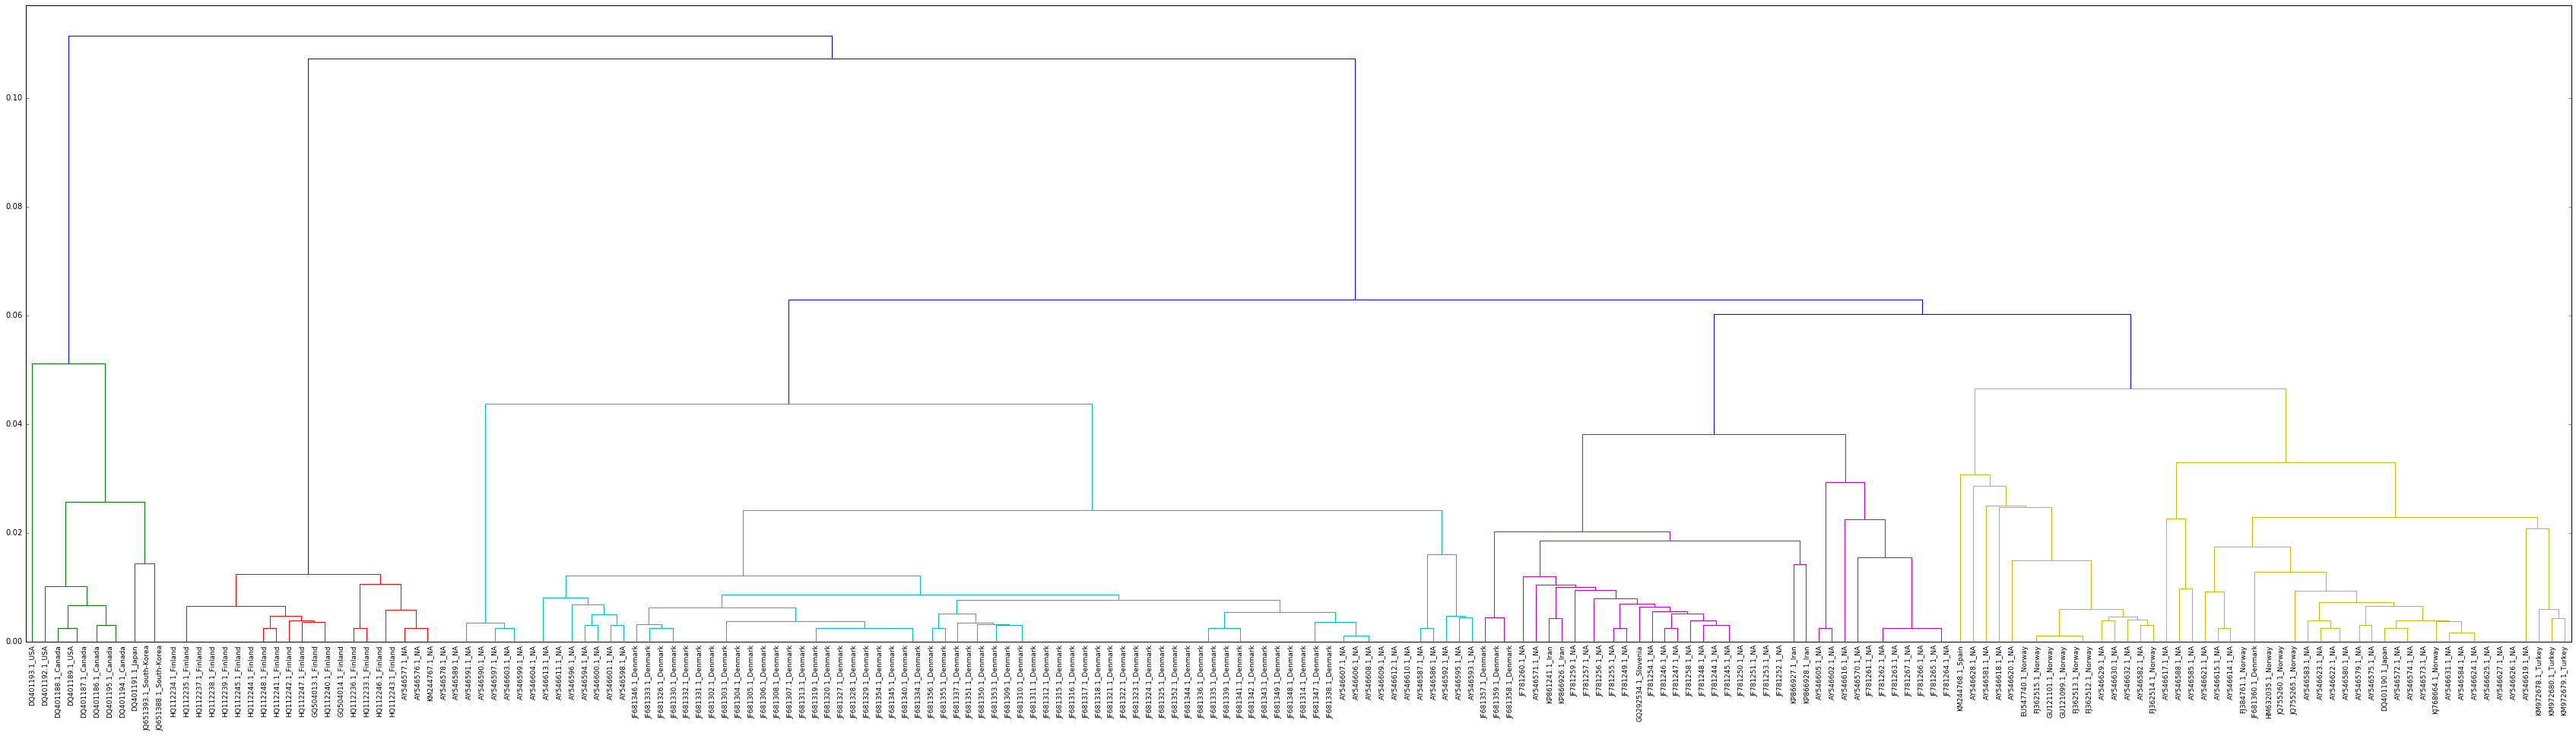

In [122]:
import scipy.cluster.hierarchy as cl
import scipy.spatial.distance as ssd

Z = cl.linkage(ssd.squareform(dmat),method='average',metric='euclidean')
fig = plt.figure(num=None,figsize=(60,15),dpi=250)
dendro=cl.dendrogram(Z,labels=leaves,color_threshold=0.06,leaf_rotation=90,leaf_font_size=9)
plt.show()

<b>→ Représentez les isolats de chaque groupe sur une carte du monde</b>

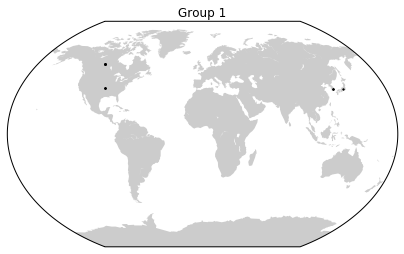

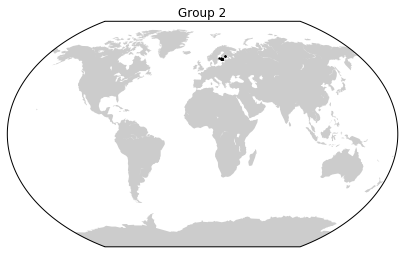

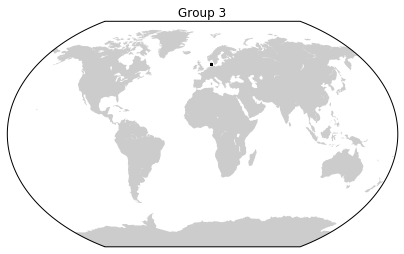

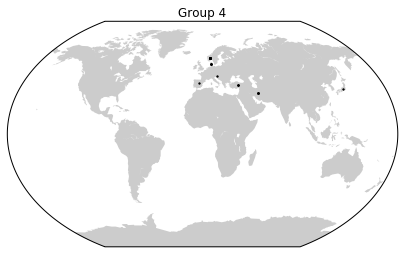

In [155]:
nb_clusters = 4
clusters = cl.fcluster(Z,nb_clusters,criterion='maxclust')

for i in range(1,max(clusters)+1):

    idxi = [j for j,cluster in enumerate(clusters) if cluster==i]
    
    lat_tmp = []
    lon_tmp = []
    for j,idxj in enumerate(idxi):
        access_number_of_leave = leaves[idxj].split('_')[0]
        lat_tmp.append(lat[name.index(access_number_of_leave)])
        lon_tmp.append(lon[name.index(access_number_of_leave)])     
    
    # plot
    fig = plt.figure(num=None,figsize=(7,6),dpi=150)   
    m = Basemap(projection='kav7',lon_0=0,lat_0=60)
    x, y = m(lon_tmp,lat_tmp) # transform (lat,lon) with the projection
    m.scatter(x,y,7,marker='.',color='k')
    m.fillcontinents(zorder=0)
    plt.title('Group '+str(i))
    plt.show()        
    fig.savefig('map_isolats-'+str(i)+'.jpg', dpi=fig.dpi)

Sur plusieurs de ces figures, vous pouvez voir que le virus “voyage” parfois même de très longues distances. L’une des raisons principales de cette propagation vient de l’échange d’oeufs et de larves de poissons contaminés entre pisciculteurs du monde entier (p.ex. entre l’Amérique du Nord et l’Asie).

<p style="background-color:#AFEEEE;padding:3px"><font size="4"><b>3.2 </b></font>A l’aide du tableau ci-dessous, définissez le(s) genotype(s) probable auxquels appartiennent les 4 groupes identifiés. 
</p>

<i>Nota: Ces génotypes ont été définis en comparant les séquences des protéines G et N, alors qu’ici nous n’avons étudié que la protéine G.</i>

<table>

<tr>
<td><b>Type</b></td>
<td><b>Prevalent host type and location (source: <a href="https://en.wikipedia.org/wiki/Viral_hemorrhagic_septicemia">Wikipedia</a>)</b></td>
</tr>

<tr>
<td>I-a</td>
<td>Farmed rainbow trout and a few other freshwater fish in continental Europe</td>
</tr>

<tr>
<td>I-b</td>
<td>Marine fish of the Baltic Sea, Skagerrak, Kattegat, North Sea, Japan</td>
</tr>

<tr>
<td>I-c</td>
<td>Farmed rainbow trout Denmark</td>
</tr>

<tr>
<td>I-d</td>
<td>Farmed rainbow trout in Norway, Finland, Gulf of Bothnia</td>
</tr>

<tr>
<td>I-e</td>
<td>Rainbow trout in Georgia, farmed and wild turbot in the Black Sea</td>
</tr>

<tr>
<td>II</td>
<td>Marine fish of the Baltic Sea</td>
</tr>

<tr>
<td>III</td>
<td>Marine fish of the British Isles and northern France, farmed turbot in the UK and Ireland, and Greenland halibut (Reinhardtius hippoglossoides) in Greenland</td>
</tr>

<tr>
<td>IV-a</td>
<td>Marine fish of the Northwest Pacific (North America), North American north Atlantic coast, Japan, and Korea</td>
</tr>

<tr>
<td>IV-b</td>
<td>Freshwater fish in North American Great Lakes region</td>
</tr>

</table>

Je pense que les génotypes probables pour chaque groupe sont les suivants :

-Groupe 1 (Japon, Canada, USA, Corée du Sud) --> I-b   IV-a   IV-b 

-Groupe 2 (Finlande) --> I-d  I-a II I-b

-Groupe 3 --> (Danemark) --> I-a I-b I-c II  

-Groupe 4 (Norvège, Danemark, Turquie, Espagne...) --> I-a I-b I-c I-d I-e (Georgia tout près de la Turquie) II 

## 4. Pour aller plus loin… L’épidémiologie

Les virus évoluent très rapidement à l’échelle de la vie humaine, et peuvent se propager rapidement à travers le monde. Un exemple de virus qui évolue très rapidement est la grippe saisonnière. Après chaque hiver, une grande partie de la population développe des anticorps contre la grippe de cette année et est donc immunisée… Mais comme le virus de la grippe évolue rapidement, l’année suivante, un nouveau mutant apparaît pour lequel la majorité de la population n’est pas complètement immunisée. Le vaccin basé sur la grippe de l’année précédente ne protège donc que partiellement la population, et est totalement inefficace dans les rares cas où un nouveau sous-type de grippe apparaît, créant un grand risque de pandémie.
La bioinformatique est très utile pour suivre l’évolution de la grippe et comprendre comment elle se propage.

<p style="background-color:#AFEEEE;padding:3px"><font size="4"><b>4.1 </b></font>Par rapport à l’analyse faite ici, quel facteur important faudrait-il prendre en compte pour pouvoir identifier les “routes” empruntées par le virus pour se propager (i.e. “de où à où il va”)? (50 mots maximum)
</p>

Je pense qu'il faudrait prendre en compte le où les lieux d'origine du virus et de déterminer pour chacun de ces lieux un rayon de propagation (pour définir ce rayon, essayer d'en récolter des échantillons pour voir si on est au bord...).

Par exemple si on imagine deux lieux d'origine : Suisse et Espagne. Si on trace un cercle C1 pour centre la Suisse et un cercle C2 pour centre Espagne, qui sont des rayons de propagation, et que C1 et C2 se chevauchent sur la France, on pourrait imaginer qu'ils empruntent des routes passant par la France par exemple.

Evidemment, toutes les routes qui se trouvent dans ces rayons de propagation sont empruntable par le virus, et même au dela.

<p style="background-color:#AFEEEE;padding:3px"><font size="4"><b>4.2 </b></font>Le [virus Zika](http://www.who.int/mediacentre/factsheets/zika/fr/) a récemment fait la une de l'actualité. En effet, au Brésil, les autorités sanitaires locales ont observé une recrudescence de cas atteints du syndrome Guillain-Barré qui coincident avec des cas d'infections à virus Zika dans le grand public, ainsi qu’une augmentation du nombre de nouveau-nés atteints de microcéphalie dans le nord-est du pays [source: site OMS]. Répétez l'analyse de la Section 1 avec la requête <font face="courier">'zika virus[orgn] NOT "mRNA"[title]'</font>. Est-ce que le virus a été isolé et séquencé en Argentine (si oui, combien de fois)?
</p>

In [29]:
# Ici, je répète l'analyse de la Section 1 pour pouvoir répondre à la question
from Bio import Entrez
Entrez.email = "raphael.racine@heig-vd.ch" # une adresse email valide est nécessaire

In [30]:
query = 'zika virus[orgn] NOT "mRNA"[title]'
handle = Entrez.esearch(db='nucleotide',retmax=1000,term=query)
record = Entrez.read(handle)
gi = record['IdList']

In [31]:
zika_info = Entrez.efetch(db="nucleotide",id=gi,rettype="gb",retmode="xml")
zika_info = Entrez.read(zika_info)

In [32]:
def getCountry(isolat):
    features = isolat['GBSeq_feature-table'][0]['GBFeature_quals']
    for j, feat in enumerate(features):
        if feat['GBQualifier_name']=='country':
            return feat['GBQualifier_value'].split(':')[0]
    return  "NA"

countries = map(getCountry, zika_info)
argentine = filter(lambda c: c == 'Argentina', countries)

print "Ensemble des pays trouvés : "
print countries

print "\nOccurences argentine : "
print argentine

Ensemble des pays trouvés : 
['China', 'China', 'Senegal', 'Uganda', 'Cambodia', 'Senegal', 'Senegal', 'Colombia', 'Brazil', 'Brazil', 'Brazil', 'USA', 'Brazil', 'Brazil', 'Israel', 'Israel', 'Israel', 'Israel', 'Mexico', 'Mexico', 'China', 'China', 'Brazil', 'China', 'Russia', 'China', 'Italy', 'Italy', 'China', 'Mexico', 'Brazil', 'Brazil', 'Russia', 'Colombia', 'China', 'Thailand', 'Philippines', 'Thailand', 'China', 'China', 'Uganda', 'Indonesia', 'Brazil', 'Mexico', 'Brazil', 'Brazil', 'Brazil', 'Brazil', 'Brazil', 'Brazil', 'Brazil', 'Brazil', 'Brazil', 'Brazil', 'Brazil', 'Brazil', 'Brazil', 'Brazil', 'Brazil', 'Brazil', 'Brazil', 'Uganda', 'Martinique', 'Haiti', 'Colombia', 'Colombia', 'Guatemala', 'Guatemala', 'Puerto Rico', 'Brazil', 'Brazil', 'Brazil', 'Brazil', 'Brazil', 'Suriname', 'Suriname', 'Suriname', 'Suriname', 'NA', 'Central African Republic', 'Central African Republic', 'Central African Republic', 'Chile', 'Chile', 'Chile', 'Chile', 'Chile', 'Chile', 'Chile', 'Chil

On constate que le virus n'a pas été séquencé en Argentine.